# Problemas 

#1. Area 
Hallar el área de un segmento circular cuya area sea igual a una cuarta parte del área del circulo. Para la solución se sugiere lo siguiente:

a) Encontrar la ecuacion trascendental.

b) Con la ecuación anterior, definir una funcion $f(\theta)=0$. Emplee la funcion labmda de python.

c) Construir una data frame de pandas con la columna "theta" con 1000 registros(filas) entre $[-2\pi, 2\pi]$. Sugerencia, para construir el data frame emplee la función linspace como sigue : np.linspace(-2*np.pi, 2*np.pi, 1000 )

d) Construir una segunda columna titulada "F_theta" con los registros f(theta)

f) Realice un gráfico de  "F_theta" vs "theta". Identifique el intervalo de la raiz.

Estime el valor del ángulo empleando los siguientes metodos(Emplee  la documentacion):

g) [Bisección](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.bisect.html)

h) [Newton-Rapshon](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html)

i) [Secante](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html) 

j) [Punto Fijo](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fixed_point.html)




**A)** Encontrar la ecuación trascendental

El área del cono a considerar es:
\begin{equation}
A1= \frac{R^2\theta}{2} 
\end{equation}

El área del triangulo está dada por:

\begin{equation}
A2= (sin\frac{\theta}{2})(cos\frac{\theta}{2}) R^2
\end{equation}

Por lo tanto el área de la región circular es:

\begin{equation}A=\frac{R^2\theta}{2} - (sin\frac{\theta}{2})(cos\frac{\theta}{2}) R^2
\end{equation}

Como el area del segmento circular debe ser igual a la cuarta parte del área de un círculo

\begin{equation}\frac{\pi R^2}{4}=\frac{R^2\theta}{2} - (sin\frac{\theta}{2})(cos\frac{\theta}{2}) R^2
\end{equation}


\begin{equation}\frac{\pi}{2}= \theta- 2(sin\frac{\theta}{2})(cos\frac{\theta}{2})
\end{equation}

De la identidad trigonométrica:

\begin{equation} sin\theta=2(sin\frac{\theta}{2})(cos\frac{\theta}{2})\end{equation}







Por tanto, la ecuacion que modela el problema es:

\begin{equation}\frac{\pi}{2} =\theta-sin\theta
\end{equation}









**B.** Encontrar el valor de \begin{equation} \theta
\end{equation} que satisface la ecuación es equivalente a encontrar las raíces de la función:

\begin{equation}f(\theta)=\theta-sin\theta-\frac{\pi}{2} 
\end{equation}


In [2]:
#Librerías
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from scipy import optimize

In [3]:
#Función que modela el problema

f = lambda theta: theta-np.sin(theta)-np.pi/2


**c)** Construir una data frame de pandas con la columna "theta" con 1000 registros(filas) entre  [−2π,2π] . Sugerencia, para construir el data frame emplee la función linspace como sigue : np.linspace(-2np.pi, 2np.pi, 1000 )

In [ ]:
# Se construye un DataFrame con valores de Theta
theta=np.linspace(-2*(np.pi),2*(np.pi),1000) 

**d)** Construir una segunda columna titulada "F_theta" con los registros f(theta)

In [9]:
# Se construye una segunda columna con los registros f(theta)
df = pd.DataFrame() 
df["theta"] = theta
df["F_theta"] = f(theta)
df

,theta,F_theta
0,-6.283185,-7.853982
1,-6.270606,-7.853981
2,-6.258027,-7.853979
3,-6.245448,-7.853973
4,-6.232870,-7.853960
...,...,...
995,6.232870,4.712368
996,6.245448,4.712380
997,6.258027,4.712386
998,6.270606,4.712389


**f)** Realice un gráfico de "F_theta" vs "theta". Identifique el intervalo de la raiz.

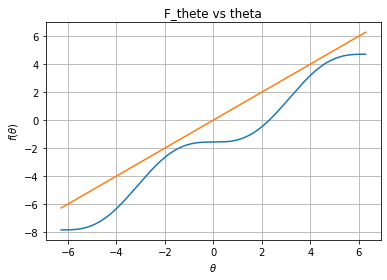

In [10]:
#Gráfico 
plt.figure()
plt.plot(df["theta"], df["F_theta"] )
plt.title('F_thete vs theta')
plt.xlabel("$\\theta$")
plt.ylabel("$f(\\theta)$")
plt.plot(theta,theta)
plt.grid()
plt.show()

Estime el valor del ángulo empleando los siguientes metodos(Emplee la documentacion):

In [36]:
#Método de bisección
root = optimize.bisect(f, 0, 4)
print("EL ángulo es:", root )

EL ángulo es: 2.309881460010729


In [ ]:
#Método de la secante
optimize.newton(f,2, fprime=None, args=(), tol=1.48e-08, maxiter=50, fprime2=None, x1=None, rtol=0.0, full_output=False, disp=True)

In [ ]:
#Método de Newton Rapshon
df= lambda theta: 1-np.cos(theta)
optimize.newton(f,2, df, args=(), tol=1.48e-08, maxiter=1000, fprime2=None, x1=None, rtol=0.0, full_output=False, disp=True)

Para emplear el método de punto fijo creamos una función

\begin{equation}g(\theta)=\theta+f(\theta)
\end{equation}


Sea $$\theta1$$ una raiz de f, entoces tenemos que 

\begin{equation}g(\theta1)=\theta1+f(\theta1)
\end{equation}

\begin{equation}g(\theta1)=\theta1
\end{equation}







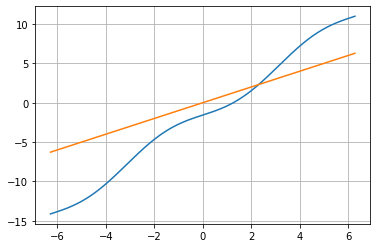

In [11]:
# Punto Fijo
g=lambda theta: 2*theta-np.sin(theta)-np.pi/2 

plt.plot(theta,g(theta))
plt.plot(theta,theta)
plt.grid()


In [12]:
#De la gráfica podemos observar que 2 es un punto aproximado a la raíz buscada

optimize.fixed_point(g,2, args=(), xtol=1e-08, maxiter=100, method='del2')

array(2.30988146)




# 2. Movimiento de proyectiles en presencia de viento.

Supongamos que un proyectil es lanzado desde el origen con una rapidez $v=vo( \cos \theta , \sin \theta $. Supongamos además que el efecto del viento sobre el proyectil es el de una fuerza proporcional a la velocidad relativa entre el viento y el proyectil. Teniendo presente que si u es la velocidad del viento y $\alpha$ el ángulo que hace dirección de esta velocidad con el eje x, se puede entrontrar las siguientes ecuaciones diferenciales, asociada al estado de movimiento del [proyectil](https://iopscience.iop.org/article/10.1088/0143-0807/36/2/025016/meta):


\begin{equation}
m\frac{dv_x}{dt} = -mb(v_x-u\cos \alpha )
\end{equation}

\begin{equation}
m\frac{dv_y}{dt} = -mg-mb(v_x-u\sin \alpha ),
\end{equation}

donde b es el párametro de rozamiento. La soluciones a las ecuaciones anteriores vienen dadas por:

Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y 
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

Ver imagen:  http://www.sc.ehu.es/sbweb/fisica3/fluidos/viento/parabolico.html


```



1. Defina dos funciones, una para x y otra para y. 

```

#Posicion en x
def pos_x(t, theta, alpha, v0, b, u,g):
  x = #escriba aca la expresión
  return x

#Posicion en y
def pos_y(t, theta, alpha, v0, b, u,g):


  y = #escriba aca la expresión
  return y 

```

2. Construya un diccionario con las claves "X", "Y", "Tiempo"

3. Con el diccionario construya un data frame de pandas llamado df con los nombres de columnas "X", "Y", "Tiempo"  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html. Defina 1000 regitros para el intervalo de tiempo elegido.


4. Realice un gráfico de x como función del tiempo, de y como función del tiempo y la trayectoria de la partícula (df["X"], df["tiempo"], df["Y"]).


5. Determine el alcance máximo de la partícula, para ello tome  la solucion teórica con $y=0$, solucione numéricamente la ecuación para t y remplace este valor en la ecuación para x. Resuelvalo para $\theta=45^{o}$.  

6. Construya una  grafica del alcance máximo R como función de $\theta$, varie $\theta$  entre 10 y 80 grados cada 5 grados.

7. Realice una interpolacion de R como función de theta.









In [16]:
#Datos dados
v0 = 60                    #Velocidad en m/s
alpha = np.pi              #Angulo del viento
theta = np.deg2rad(45)    
u =0                 #rapidez del viento
b = 0.05                   #Parametro de friccion 
g = 9.8                    #Aceleracion de la gravedad m/s2

Params = (alpha, v0, b, u, g)  #Parametros en tupla. #Angulo de lanzamiento


**1.** Defina dos funciones, una para x y otra para y. 

In [17]:
#Funciones para las posiciones en x e y

#Posici+on en x
def pos_x(t, theta, alpha, v0, b, u, g):
  T1 = u * t * np.cos(alpha)                              #Término 1
  T2 = (1./b)*(v0*np.cos(theta) - u*np.cos(alpha) )        #Término 2
  T3 = (1 - np.e**(-b*t))                                   #Término 3

  return T1 + T2*T3 
    

#Posición en y
def pos_y(t, theta, alpha, v0, b, u,g):

  T1 = (1./b)*(g/b + v0*np.sin(theta) - u*np.sin(alpha) ) #término 1
  T2 = (1 - np.e**(- b * t)) #término 2
  T3 = (g / b - u *  np.sin(alpha))*t #término 3

  return T1* T2 - T3

**2.** Construya un diccionario con las claves "X", "Y", "Tiempo"

In [19]:
#Construcción de diccionario con las  claver 'X', 'Y' y 'TIEMPO'

t = np.linspace(0, 20, 100)      # Tiempo 
x = pos_x(t, theta, *Params)
y = pos_y(t, theta, *Params) 
mov = { "X": x , "Y": y, "Tiempo": t }  # diccionario



3. Con el diccionario construya un data frame de pandas llamado df con los nombres de columnas "X", "Y", "Tiempo"  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html. Defina 1000 regitros para el intervalo de tiempo elegido.
 

In [20]:
df = pd.DataFrame.from_dict(mov)

**4.** Realice un gráfico de x como función del tiempo, de y como función del tiempo y la trayectoria de la partícula (df["X"], df["tiempo"], df["Y"]).
 

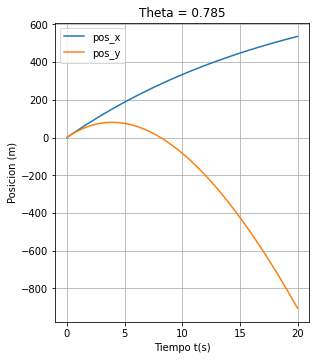

In [21]:
#Datso para el gráfico de x e y como función del tiempo 
plt.figure(figsize=(10,5.5))
plt.subplot(121)
plt.plot(df["Tiempo"], df["X"], label="pos_x") 
plt.plot(df["Tiempo"], df["Y"], label="pos_y")
plt.xlabel("Tiempo t(s)")
plt.ylabel("Posicion (m)")
plt.legend()
plt.title("Theta = " + str("%.3lf"%theta))
plt.grid()

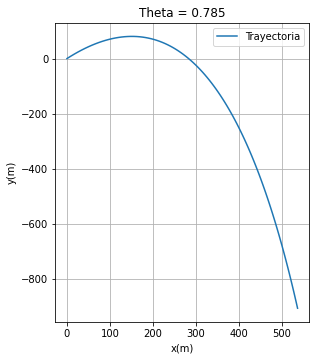

In [22]:
#Gráfico de la trayectoria de la partícula
plt.figure(figsize=(10,5.5))
plt.subplot(122)
plt.plot(df["X"], df["Y"], label="Trayectoria") 
plt.xlabel("x(m)")
plt.ylabel("y(m)")
plt.legend()
plt.title("Theta = " + str("%.3lf"%theta))
plt.grid()
plt.show()

5. Determine el alcance máximo de la partícula, para ello tome  la solucion teórica con $y=0$, solucione numéricamente la ecuación para t y remplace este valor en la ecuación para x. Resuelvalo para $\theta=45^{o}$.


Posicion en y 
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}


In [24]:
#Datos 
v0 = 60                    #Velocidad inicial de la partécula en m/s     
alpha = np.pi              #Ángulo del viento                            

theta = np.deg2rad(45)     #Ángulo de lanzamiento de la partícula       

u = v0/2                   #Rapidez del viento                           
b = 0.05                   #Parámetro de fricción                        
g = 9.8                    #Aceleración de la gravedad m/s2              

In [25]:
def pos_y(t, theta, alpha, v0, b, u, g):

  T1 = (1./b)*(g/b + v0*np.sin(theta) - u*np.sin(alpha) )   # término 1
  T2 = (1 - np.e**(- b * t))            # término 2
  T3 = (g / b - u *  np.sin(alpha))*t   # término 3

  return T1*T2 - T3

In [26]:
#Tiempo en el que la partícula vuelve al piso
tf = optimize.newton(pos_y, 10, args=(theta, alpha, v0, b, u,g))  

In [27]:
pos_y(tf, theta, alpha, v0, b, u, g)

4.547473508864641e-13

Con las raíces de la función se obtiene el tiempo para el que la partícula llega al suelo . Se evalúa este valor en x y se obtiene el alcance máximo sobre el eje 

In [28]:
#Alcance máximo sobre el eje x
pos_x(tf, theta, alpha, v0, b, u, g)   

239.60614945520706

6. Construya una  grafica del alcance máximo R como función de $\theta$, varie $\theta$  entre 10 y 80 grados cada 5 grados.

---



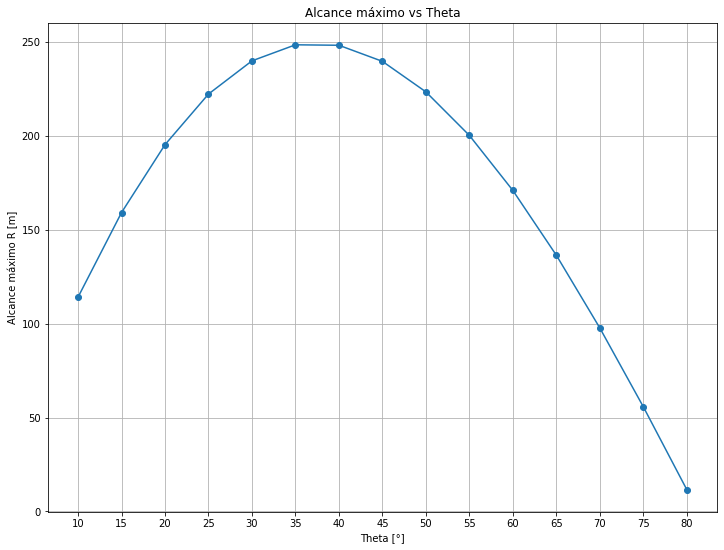

In [37]:
# Arreglo de alcances máximos
th1 = np.arange(10, 80+5, 5)
th = np.radians(th1)
am = np.zeros(len(th))        

for i in range(th.size):
  # Tiempo en el que la partícula llega al suelo
  tam = optimize.newton(pos_y, 10, args=(th[i], alpha, v0, b, u,g))
  # Alcance máximo para theta[i]
  am[i] = pos_x(tam, th[i], alpha, v0, b, u, g)     

#Datos gráfica del alcance máximo como función de theta
plt.figure(figsize=(12,9))
plt.plot(th1, am, 'o-')
plt.title('Alcance máximo vs Theta')
plt.xlabel('Theta [°]')
plt.ylabel('Alcance máximo R [m]')
plt.xticks(th1)
plt.grid()

7. Realice una interpolacion de R como función de theta.

In [30]:
#Librería
from scipy.interpolate import lagrange


AM = lagrange(th1,am)  

In [31]:
AM

poly1d([ 5.21944577e-28, -4.06741855e-25,  1.45646938e-22, -3.07760094e-20,
        3.85279342e-18, -1.64056943e-16, -4.08228674e-14,  9.85550655e-12,
       -9.44003576e-10, -2.36236738e-08,  2.17833578e-05, -1.79060077e-03,
       -1.25602464e-01,  1.28228277e+01, -1.13479959e-06])

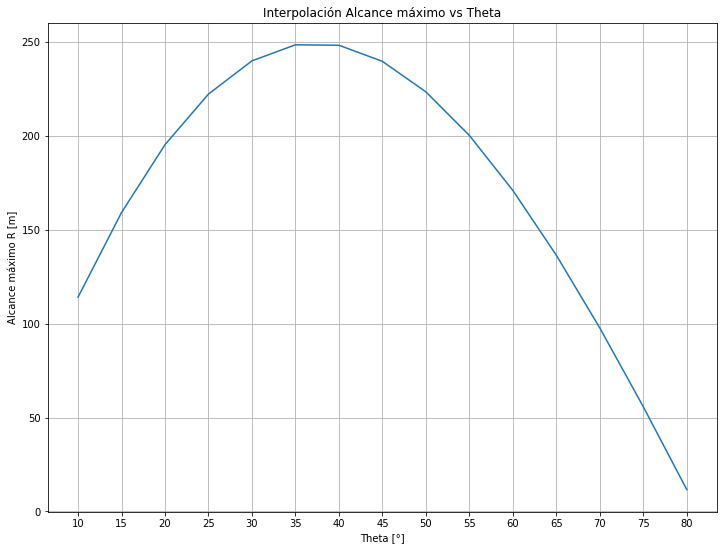

In [32]:
#Datos gráfico interpolación
plt.figure(figsize=(12,9))
plt.plot(th1,AM(th1))
plt.title('Interpolación Alcance máximo vs Theta')
plt.xlabel('Theta [°]')
plt.ylabel('Alcance máximo R [m]')
plt.xticks(th1)
plt.grid()